Most of the contents of this notebook were prepared by Dr. Edward Raff (Spring 2019)

## LINEAR REGRESSION

In [117]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import seaborn as sns

First, lets remember linear regression. The goal is to learn a set of weights $\theta$ to predict a value $y$, based on a datapoint $x$. If $x$ has $d$ features, this looks like:

$$ {h_\theta}(x) = \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + \ldots + \theta_{d-1} \cdot x_{d-1} + \theta_d \cdot x_d$$

Written with more math-like notation, that becomes

$${h_\theta}(x) = \sum_{i=1}^d \theta_i \cdot x_i = \theta^T x$$


To learn these weights $\theta$ we use our training data. We have $m$ datapoints, $x^{(1)}, x^{(2)}, \ldots, x^{(m)}$ and associated labels $y^{(1)}, y^{(2)}, \ldots, y^{(m)}$. 

We will use what is called a ***cost function*** or an ***objective function***. It is a function that describes a score we want to minimize in order to achieve our goal. For linear regression, our cost function is parameterized with $\theta$.

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left(\underbrace{\theta^T x^{(i)}}_{\text{Prediction}} - \underbrace{y^{(i)}}_{\text{Target}}\right)^2$$

Optimization is done using a gradient, so we a need a gradient:

$$\nabla_\theta J = \frac{1}{m} \sum_{i=1}^n x^{(i)} \cdot \underbrace{( \theta^T x^{(i)}-y^{(i)})}_{\text{The error}}$$

Lets look at some naive code for this. 

Assume there is only one variable ($\theta_1$), there is not even bias(intercept) term ($\theta_0$).

Notation: w is used instead of $\theta_1$, @ stands for dot product, X denotes data points ($x^{(1)}, x^{(2)}, \ldots, x^{(m)}$), and y denotes  labels ($y^{(1)}, y^{(2)}, \ldots, y^{(m)}$).

In [118]:
def _gradient_step(w, error, rate = 0.3):
    update = error * rate
    return w - update
  
def linear_regression(X,y):
  def objective_func(w):
    return np.sum((X @ w - y) * (X @ w - y))/(2*len(y))
  def gradient(w):
    return np.sum([X[i] * (X[i]*w - y[i]) for i in range(y.shape[0])])/len(y)

  #Lets pick some starting value for our weight vector. 
  w = np.zeros(X.shape[1])
  
  for i in range(30):
    w = _gradient_step(w, gradient(w))
    print(w,objective_func(w))
  return w  
  

We will use make_regression() function to make a toy regression problem. [See documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html )

<class 'tuple'>


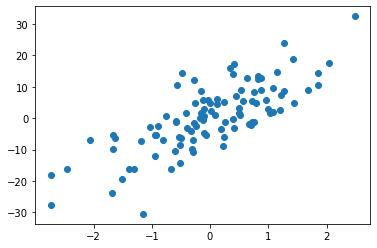

In [119]:
# Line below generates a random regression problem (no_of_samples, no_of_features ..)
data = datasets.make_regression(100,1,noise = 7)
print(type(data))
#display(data)
pyplot.plot(data[0][:], data[1][:], marker="o", linestyle='')
#a=data[0]
#b=data[1]
#print(type(a), type(b))
#print(a.shape, b.shape)
#help(pyplot.plot)

In [120]:
w = linear_regression(data[0], data[1])
# remember, what it prints are w(theta_1) and current value of objective_func

[2.46742245] 39.1218356709674
[4.18548297] 30.77680890656965
[5.38176452] 26.730885780016564
[6.21473259] 24.769299028034673
[6.79472632] 23.818262029754127
[7.1985746] 23.357170328770405
[7.47977323] 23.13361902939882
[7.67557117] 23.025234551118025
[7.81190483] 22.972686455154275
[7.90683364] 22.947209537857486
[7.97293235] 22.934857552442153
[8.01895673] 22.928868933728083
[8.05100339] 22.925965468989688
[8.07331741] 22.924557780858322
[8.08885461] 22.923875290780515
[8.09967313] 22.923544398805284
[8.10720604] 22.923383972298247
[8.11245118] 22.92330619264179
[8.11610337] 22.923268482695516
[8.11864637] 22.923250199765093
[8.12041706] 22.92324133564361
[8.12164999] 22.923237038047557
[8.12250847] 22.923234954442105
[8.12310624] 22.92323394424672
[8.12352245] 22.92323345447323
[8.12381227] 22.923233217016133
[8.12401406] 22.923233101889696
[8.12415457] 22.923233046072895
[8.12425241] 22.92323301901121
[8.12432053] 22.92323300589089


## Solving linear regression with Scikit-learn.
The toy implementation above is just for demonstration, and doesn't have all the features we would want when doing some real machine learning. 
Below we will use Scikit-learn's implementation.

First lets put the data into a *dataframe*. We do not have to, but sometimes it makes things easier.

In [121]:
df=pd.DataFrame(data=np.c_[data[0],data[1]], columns=['X','Y'])
#np.c_[a,b] is the same with np.column_stack((a,b))
#similarly there is also np.r_[a,b] for row stack
display(df)

,X,Y
0,-2.738252,-18.265571
1,-1.657435,-9.889697
2,0.341659,16.093670
3,-0.306773,-9.840103
4,0.539381,8.979548
...,...,...
95,-0.391297,-3.254054
96,1.072684,1.801454
97,1.149642,14.584532
98,-0.260359,4.925714


In [122]:
df.head()

,X,Y
0,-2.738252,-18.265571
1,-1.657435,-9.889697
2,0.341659,16.093670
3,-0.306773,-9.840103
4,0.539381,8.979548


In [123]:
X = df['X'].values.reshape(-1, 1) 
#X = df['X'].values
Y = df['Y'].values.reshape(-1, 1)
print(X.shape)
print(Y.shape)
#help(df.values.reshape)

(100, 1)
(100, 1)


Now we are ready to call the built-in function for linear regression.

In [124]:
lr = LinearRegression()
lr.fit(X,Y)
#help(lr)

#A note on normalization
#In LinearRegression() default value for 'normalize' parameter is True.
#I.e. X will be normalized before regression by subtracting the mean and dividing by the l2-norm

LinearRegression()

In [125]:
lr.coef_, lr.intercept_

(array([[8.12214554]]), array([0.46294982]))

This new version has so-called ***intercept*** ($\theta_0$ in lecture notes).

$$h_{\theta}(x) = \theta_0 + \theta_1 x_1$$

So this solution corresponds to the line  y = lr.intercept_ + x*lr.coef_

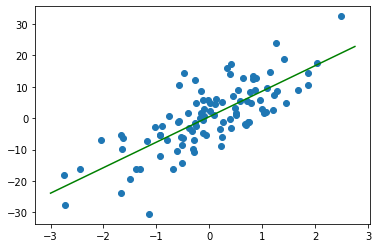

In [126]:
f = lambda x: lr.coef_[0] * x + lr.intercept_
steps = list(np.arange(-3,3,.25))
fitline = list(map(f, steps))
pyplot.plot(steps, fitline, color='green')
pyplot.scatter(x=df.X,y=df.Y)

With the intercept term, our fit line does not have to pass through (0,0) point anymore. Why it is important? Lets modify our data points by moving them up:

In [127]:
df["Y"] += 40

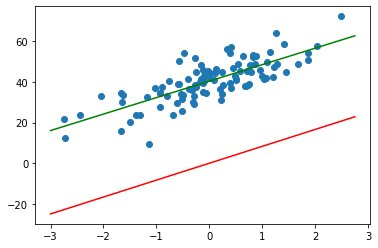

In [128]:
lr_a = LinearRegression(fit_intercept=False)
lr_a.fit(df['X'].values.reshape(-1, 1),df['Y'])

lr_b = LinearRegression(fit_intercept=True)
lr_b.fit(df['X'].values.reshape(-1, 1),df['Y'])

f = lambda x: lr_a.coef_[0] * x + lr_a.intercept_
steps = list(np.arange(-3,3,.25))
pyplot.plot(steps, list(map(f, steps)),color='red')

f = lambda x: lr_b.coef_[0] * x + lr_b.intercept_
steps = list(np.arange(-3,3,.25))
pyplot.plot(steps, list(map(f, steps)),color='green')

pyplot.scatter(x=df.X,y=df.Y)

## BOSTON dataset

In [129]:
data = datasets.load_boston()

In [130]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [131]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [132]:
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

In [133]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [134]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

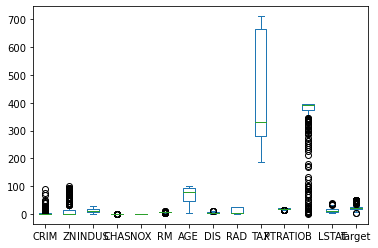

In [135]:
housing_df.plot.box()

<AxesSubplot:>

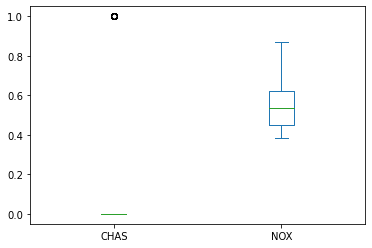

In [136]:
housing_df[['CHAS','NOX']].plot.box()

<AxesSubplot:xlabel='NOX', ylabel='target'>

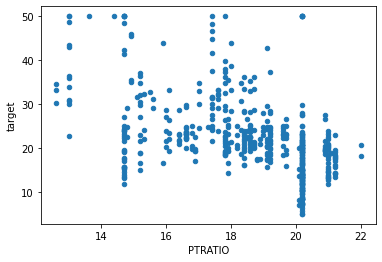

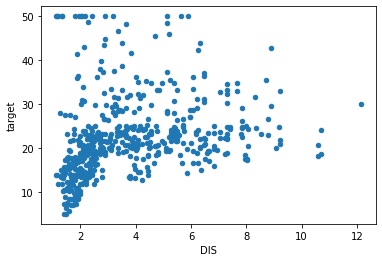

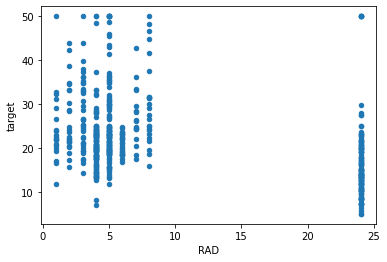

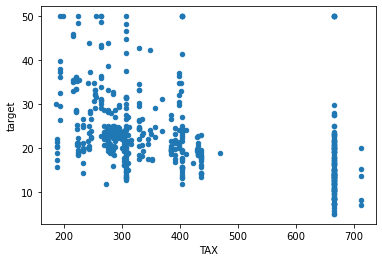

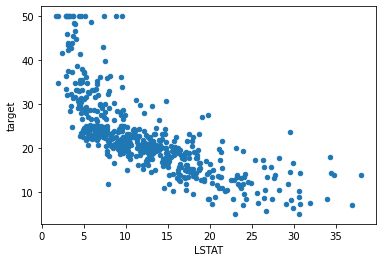

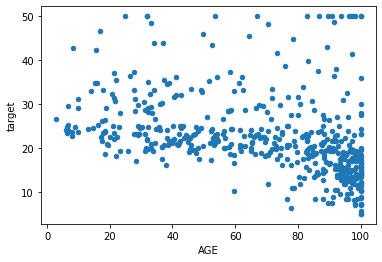

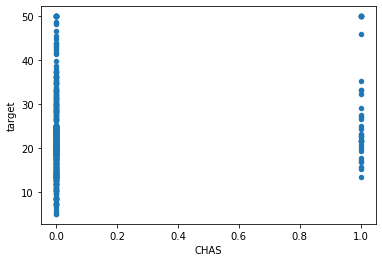

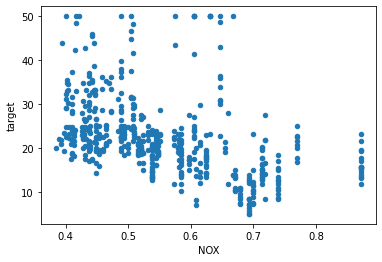

In [137]:
housing_df.plot.scatter(x='PTRATIO',y='target')   #pupil-teacher ratio by town
housing_df.plot.scatter(x='DIS',y='target')  #weighted distances to five Boston employment centres
housing_df.plot.scatter(x='RAD',y='target')  #index of accessibility to radial highways
housing_df.plot.scatter(x='TAX',y='target')  #full-value property-tax rate per $10,000
housing_df.plot.scatter(x='LSTAT',y='target')  #% lower status of the population
housing_df.plot.scatter(x='AGE',y='target')   #proportion of owner-occupied units built prior to 1940
housing_df.plot.scatter(x='CHAS',y='target')  #Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
housing_df.plot.scatter(x='NOX',y='target')  #nitric oxides concentration (parts per 10 million)

In [138]:
lr = LinearRegression()
X=housing_df[['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']]
y=housing_df['target']

In [139]:
lr.fit(X,y)
#help(lr)

LinearRegression()

In [140]:
print(lr.predict([X.iloc[501]])*1000)
#print((np.dot(lr.coef_,X.iloc[501])+lr.intercept_)*1000)
print(y.iloc[501]*1000)

[23533.34054667]
22400.0


In [141]:
print(lr.score(X,y))
help(lr.score)

0.7406426641094095
Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Return the coefficient of determination :math:`R^2` of the
    prediction.
    
    The coefficient :math:`R^2` is defined as :math:`(1 - \frac{u}{v})`,
    where :math:`u` is the residual sum of squares ``((y_true - y_pred)
    ** 2).sum()`` and :math:`v` is the total sum of squares ``((y_true -
    y_true.mean()) ** 2).sum()``. The best possible score is 1.0 and it
    can be negative (because the model can be arbitrarily worse). A
    constant model that always predicts the expected value of `y`,
    disregarding the input features, would get a :math:`R^2` score of
    0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_sam

In [142]:
print(lr.coef_)
print(lr.intercept_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.459488385089855


# Homework #1   Due date: 18 June 2022, 11:59 PM

## Q1) One feature regression for Boston data. 
Choose one of the features in Boston data, try to select one that is mostly correlated (or inversely correlated) with the target. Fit a line with linear Regression. What is the equation of the fitting line? Please plot your data points (chosen feature vs. target) and plot your fitting line on it.

### from boston data i am selecting LSTAT with the target. LSTAT is mostly correlated with the target

<AxesSubplot:xlabel='LSTAT', ylabel='target'>

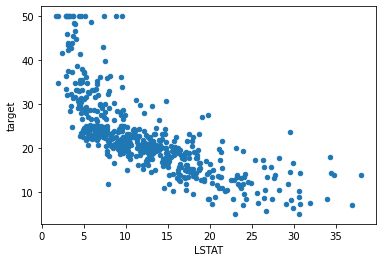

In [143]:
housing_df.plot.scatter(x='LSTAT',y='target')  #% lower status of the population

In [144]:
import math

#### finding the coefficient and intercept of the linear equation using linear regression

In [145]:
X=housing_df['LSTAT'].values.reshape(-1, 1)
y=housing_df['target'].values.reshape(-1, 1)
lr.fit(X,y)
lr.coef_, lr.intercept_

(array([[-0.95004935]]), array([34.55384088]))

#### the linear equation which fits the considerd data is in the form of y=(-m)*x+c.the line is decreasing so it has negative slope
#### target=(-0.95004935)*LSTAT + 34.55384088

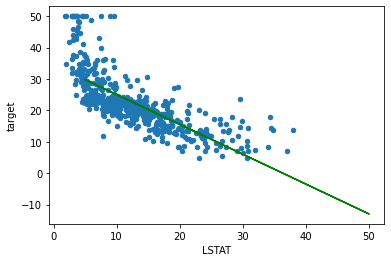

In [154]:
housing_df.plot.scatter(x='LSTAT',y='target')
#y=y.reshape(-1)
#f= lambda x:lr.coef_*(-x)+lr.intercept_
#steps = list(np.arange(0,30,0.4))
#fitline = list(map(f, steps))
#pyplot.plot(steps, list(map(f, steps)), color='green')

pyplot.plot(housing_df.target,lr.predict(housing_df[["target"]]),color="green")

## Q2) Another metric for performance evaluation
We have seen that LinearRegression() by *sklearn* provides a method called *score* which outputs a value with a maximum of 1 (the larger the better), which is good to evaluate the performance. 
Another common performance metric is mean sum of squared error (MSSE):

$$\frac{1}{m} \sum_{i=1}^m \left(\underbrace{\theta^T x^{(i)}}_{\text{Prediction}} - \underbrace{y^{(i)}}_{\text{Target}}\right)^2$$

Please implement this metric and compute it when Boston data with all features are used. lr.score gave 0.74. What is the MSSE?

Important restriction: Do NOT use *mean_squared_error* module from *sklearn.metrics*.

#### loading the boston data set

In [168]:
data = datasets.load_boston()

###### defining x,y values to fit the linear regression

In [169]:
lr = LinearRegression()
X=housing_df[['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']]
y=housing_df['target']

In [170]:
lr.fit(X,y)

LinearRegression()

#####  printing the original target values

In [171]:
y_true=housing_df.target.values.reshape(-1,1)
y_true

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

#### finding the predicted values for the target

In [177]:
y_predict=lr.predict(y)
y_predict

ValueError: Expected 2D array, got 1D array instead:
array=[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 30.3 34.6 34.9 32.9 24.1 42.3 48.5 50.  22.6 24.4 22.5 24.4 20.
 21.7 19.3 22.4 28.1 23.7 25.  23.3 28.7 21.5 23.  26.7 21.7 27.5 30.1
 44.8 50.  37.6 31.6 46.7 31.5 24.3 31.7 41.7 48.3 29.  24.  25.1 31.5
 23.7 23.3 22.  20.1 22.2 23.7 17.6 18.5 24.3 20.5 24.5 26.2 24.4 24.8
 29.6 42.8 21.9 20.9 44.  50.  36.  30.1 33.8 43.1 48.8 31.  36.5 22.8
 30.7 50.  43.5 20.7 21.1 25.2 24.4 35.2 32.4 32.  33.2 33.1 29.1 35.1
 45.4 35.4 46.  50.  32.2 22.  20.1 23.2 22.3 24.8 28.5 37.3 27.9 23.9
 21.7 28.6 27.1 20.3 22.5 29.  24.8 22.  26.4 33.1 36.1 28.4 33.4 28.2
 22.8 20.3 16.1 22.1 19.4 21.6 23.8 16.2 17.8 19.8 23.1 21.  23.8 23.1
 20.4 18.5 25.  24.6 23.  22.2 19.3 22.6 19.8 17.1 19.4 22.2 20.7 21.1
 19.5 18.5 20.6 19.  18.7 32.7 16.5 23.9 31.2 17.5 17.2 23.1 24.5 26.6
 22.9 24.1 18.6 30.1 18.2 20.6 17.8 21.7 22.7 22.6 25.  19.9 20.8 16.8
 21.9 27.5 21.9 23.1 50.  50.  50.  50.  50.  13.8 13.8 15.  13.9 13.3
 13.1 10.2 10.4 10.9 11.3 12.3  8.8  7.2 10.5  7.4 10.2 11.5 15.1 23.2
  9.7 13.8 12.7 13.1 12.5  8.5  5.   6.3  5.6  7.2 12.1  8.3  8.5  5.
 11.9 27.9 17.2 27.5 15.  17.2 17.9 16.3  7.   7.2  7.5 10.4  8.8  8.4
 16.7 14.2 20.8 13.4 11.7  8.3 10.2 10.9 11.   9.5 14.5 14.1 16.1 14.3
 11.7 13.4  9.6  8.7  8.4 12.8 10.5 17.1 18.4 15.4 10.8 11.8 14.9 12.6
 14.1 13.  13.4 15.2 16.1 17.8 14.9 14.1 12.7 13.5 14.9 20.  16.4 17.7
 19.5 20.2 21.4 19.9 19.  19.1 19.1 20.1 19.9 19.6 23.2 29.8 13.8 13.3
 16.7 12.  14.6 21.4 23.  23.7 25.  21.8 20.6 21.2 19.1 20.6 15.2  7.
  8.1 13.6 20.1 21.8 24.5 23.1 19.7 18.3 21.2 17.5 16.8 22.4 20.6 23.9
 22.  11.9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#### defining the mean sum of square function and calling the function for the boston data set

In [178]:
def msse(actual, prediction):
    actual = np.array(actual)
    prediction = np.array(prediction)
    difference = np.subtract(actual, prediction)
    square_difference = np.square(difference)
    return square_difference.mean()

print(msse(y_true, y_predict))

409.1231791655157


#### verifying the defined function output with the original sklearn MSSE value

In [179]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_predict)
print(mse)

409.1231791655157


##### it is observed that the msse value is same from both the models.msse for boston dataset considering all the features as x and target as y the msse value is 409.1231791655157

## reference:
https://datagy.io/mean-squared-error-python/